In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from BrainTumor.subjects import Subjects
from BrainTumor.ignition_utils import *
from BrainTumor.metastability_utils import *

data_dir = "../../data"

subjects = Subjects()
subjects.initialize(data_dir)

control_subset = subjects.get_control_subset()
tumor_subset = subjects.get_tumor_subset()

ignitions = compute_ignitions(subjects)

kuramoto_metastabilities = compute_metastability(subjects)
ignition_std_mevokedinteg_metastabilities = {
    k: np.std(v.mevokedinteg) for k, v in ignitions.items()
}
ignition_mean_stdevokedinteg_metastabilities = {
    k: np.mean(v.stdevokedinteg) for k, v in ignitions.items()
}

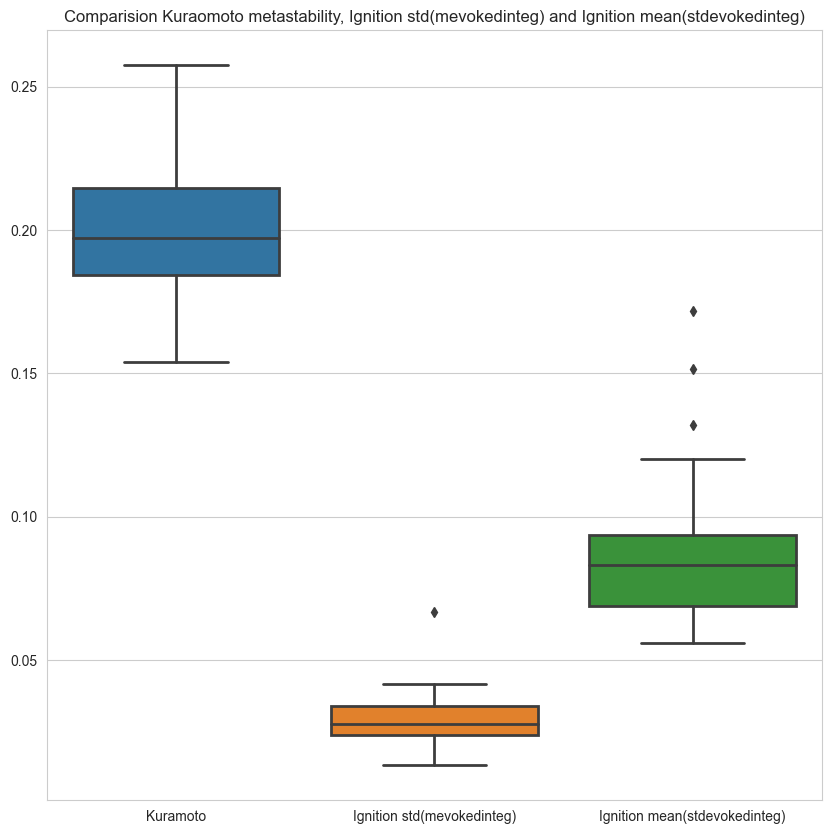

In [3]:
data = {
    'Kuramoto': [v.metastability for _, v in kuramoto_metastabilities.items()],
    'Ignition std(mevokedinteg)': [v for _, v in ignition_std_mevokedinteg_metastabilities.items()],
    'Ignition mean(stdevokedinteg)': [v for _, v in ignition_mean_stdevokedinteg_metastabilities.items()]
}

plt.figure(figsize=(10, 10))
seaborn.boxplot(
    data=pd.Series(
        data=data
    ),
    linewidth=2.0
)
plt.xticks(plt.xticks()[0], data.keys())
plt.title("Comparision Kuraomoto metastability, Ignition std(mevokedinteg) and Ignition mean(stdevokedinteg)")
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.777e-02 U_stat=8.700e+01
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.030e-01 U_stat=8.700e+01


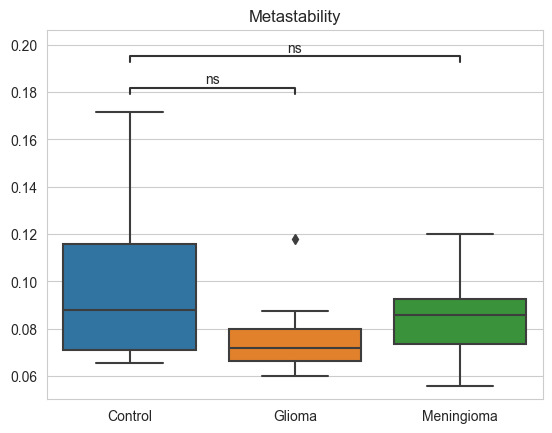

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. >= 15cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.687e-02 U_stat=9.000e+01


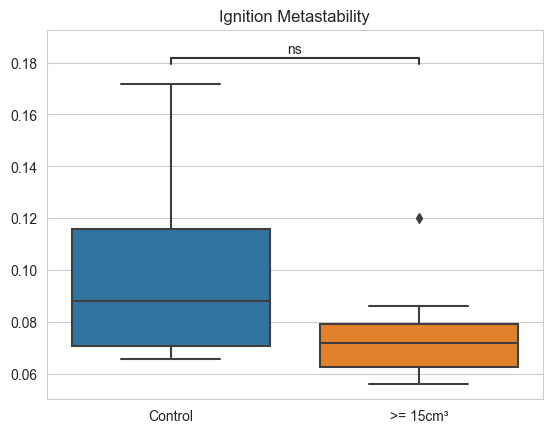

In [6]:
plotComparisonAcrossLabels2(
    {
        'Control': [v for k, v in subjects.get_control_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        'Glioma': [v for k, v in subjects.get_glioma_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        'Meningioma': [v for k, v in subjects.get_meningioma_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
    },
    graphLabel='Metastability',
    pairs=[('Control', 'Glioma'), ('Control', 'Meningioma')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v for k, v in subjects.get_control_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        '>= 15cm³': [v for k, v in subjects.get_plus_x_cm3_subset(15.0).keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
    },
    graphLabel='Ignition Metastability',
    pairs=[('Control', '>= 15cm³')]
)